## 1 introduction to the dataset
this dataset from amazon shows us the top 50 beststelling books from 2009 until 2019


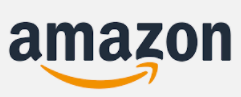



In [63]:
import pandas as pd
import numpy as np
#import missingno
#import fuzzywuzzy
#from fuzzywuzzy import process
import collections
import matplotlib.pyplot as plt
#from plotly.subplots import make_subplots
#import plotly.graph_objects as go
#import plotly.figure_factory as ff
#from scipy.stats import shapiro
from scipy.stats import mannwhitneyu


In [64]:
#load the dataset as df
df = pd.read_csv('bestsellers with categories.csv')
#show the first lines
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [65]:
# what columns we have and how many?
df.info()
print(f'we got {df.shape[0]} records and {df.shape[1]} columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
we got 550 records and 7 columns


In [66]:
# convert the year and the genre into the right datatype
df.Genre = df.Genre.astype('category')
df['Year'] = pd.to_datetime(df['Year'])
#check again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         550 non-null    object        
 1   Author       550 non-null    object        
 2   User Rating  550 non-null    float64       
 3   Reviews      550 non-null    int64         
 4   Price        550 non-null    int64         
 5   Year         550 non-null    datetime64[ns]
 6   Genre        550 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 26.6+ KB


In [67]:
#do we have any null values?
df.isna().sum() # we got luck :-)

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [68]:
# do we have duplicated data?
df.duplicated().sum()
# these code will only show us complete duplicates, but maybe a book is shown for several years. 
df.duplicated(['Name']).sum()
# so 199 books listen more than one time. 

199

In [69]:
#delete the year column and the double book name entries.
del df['Year']

In [70]:
df = df.drop_duplicates(keep = 'first')# only COMPLETE duplicates will be deleted. 
df.duplicated(['Name']).sum()
#looks like 10 book titles still got the same name 

10

In [71]:
#find the titles that still got the same name
booktitle = collections.Counter(df.Name.tolist())
booktitle.most_common(10)
#most_common() returns a list of top 'n' elements from most common to least common, as specified the parameter 'n'.

[('The Help', 3),
 ('Gone Girl', 2),
 ("Quiet: The Power of Introverts in a World That Can't Stop Talking", 2),
 ('The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change',
  2),
 ('The Fault in Our Stars', 2),
 ('The Girl on the Train', 2),
 ('The Immortal Life of Henrietta Lacks', 2),
 ('To Kill a Mockingbird', 2),
 ('Unbroken: A World War II Story of Survival, Resilience, and Redemption', 2),
 ('10-Day Green Smoothie Cleanse', 1)]

In [72]:
#this does still not explain why we got some titles more often. let´s see.
df[df['Name'] == 'Gone Girl']

,Name,Author,User Rating,Reviews,Price,Genre
135,Gone Girl,Gillian Flynn,4.0,57271,10,Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,Fiction


In [77]:
#so now we see the difference is the price of the book. we will drop the duplicated and take keep the last entry
df = df.drop_duplicates(subset = 'Name', keep = 'last') # now we specify the subset Name
# and check
df.duplicated(['Name']).sum()

0

In [74]:
#was there a typo in the names of our authors?
authors = df.Author.sort_values().unique()
authors

array(['Abraham Verghese', 'Adam Gasiewski', 'Adam Mansbach', 'Adir Levy',
       'Admiral William H. McRaven', 'Adult Coloring Book Designs',
       'Alan Moore', 'Alex Michaelides', 'Alice Schertle', 'Allie Brosh',
       'American Psychiatric Association',
       'American Psychological Association', 'Amor Towles', 'Amy Ramos',
       'Amy Shields', 'Andy Weir', 'Angie Grace', 'Angie Thomas',
       'Ann Voskamp', 'Ann Whitford Paul', 'Anthony Bourdain',
       'Anthony Doerr', 'Atul Gawande', 'Audrey Niffenegger',
       'B. J. Novak', 'Bessel van der Kolk M.D.', 'Bill Martin Jr.',
       "Bill O'Reilly", 'Bill Simmons', 'Blue Star Coloring',
       'Bob Woodward', 'Brandon Stanton', 'Brené Brown',
       'Brian Kilmeade', 'Bruce Springsteen', 'Carol S. Dweck',
       'Celeste Ng', 'Charlaine Harris', 'Charles Duhigg',
       'Charles Krauthammer', 'Cheryl Strayed', 'Chip Gaines',
       'Chip Heath', 'Chris Cleave', 'Chris Kyle', 'Chrissy Teigen',
       'Christina Baker Kline', 

In [75]:
#two Authors are listed twice due to extra whitespae 
df = df.replace('George R. R. Martin', 'George R.R. Martin')
df = df.replace('J. K. Rowling', 'J.K. Rowling')
#recheck 
authors = df.Author.sort_values().unique()
authors

array(['Abraham Verghese', 'Adam Gasiewski', 'Adam Mansbach', 'Adir Levy',
       'Admiral William H. McRaven', 'Adult Coloring Book Designs',
       'Alan Moore', 'Alex Michaelides', 'Alice Schertle', 'Allie Brosh',
       'American Psychiatric Association',
       'American Psychological Association', 'Amor Towles', 'Amy Ramos',
       'Amy Shields', 'Andy Weir', 'Angie Grace', 'Angie Thomas',
       'Ann Voskamp', 'Ann Whitford Paul', 'Anthony Bourdain',
       'Anthony Doerr', 'Atul Gawande', 'Audrey Niffenegger',
       'B. J. Novak', 'Bessel van der Kolk M.D.', 'Bill Martin Jr.',
       "Bill O'Reilly", 'Bill Simmons', 'Blue Star Coloring',
       'Bob Woodward', 'Brandon Stanton', 'Brené Brown',
       'Brian Kilmeade', 'Bruce Springsteen', 'Carol S. Dweck',
       'Celeste Ng', 'Charlaine Harris', 'Charles Duhigg',
       'Charles Krauthammer', 'Cheryl Strayed', 'Chip Gaines',
       'Chip Heath', 'Chris Cleave', 'Chris Kyle', 'Chrissy Teigen',
       'Christina Baker Kline', 

In [81]:
df.info()
df.Author.value_counts()
        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 546
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         351 non-null    object  
 1   Author       351 non-null    object  
 2   User Rating  351 non-null    float64 
 3   Reviews      351 non-null    int64   
 4   Price        351 non-null    int64   
 5   Genre        351 non-null    category
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 16.9+ KB


Jeff Kinney            12
Rick Riordan           10
J.K. Rowling            8
Stephenie Meyer         7
Dav Pilkey              6
                       ..
Christopher Paolini     1
Jennifer Smith          1
Sarah Young             1
David Grann             1
Jen Sincero             1
Name: Author, Length: 246, dtype: int64

In [ ]:
#now we got 351 book title´s written by 246 titles

## 2 define the questions
<ol>
  <li>which author has written the most bestsellers?</li>
  <li>which books got the most top reviews?</li>
  <li>is non-fiction or fiction more popular?</li>
  <li>which author got the highest average rating?</li>
  <li>are the genres different by rating?</li>
</ol>
